In [98]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the correct path to your file
file_path = 'https://raw.githubusercontent.com/Rimbik/assessments/refs/heads/main/Employee_Turnover_Analysis/ds/HR_comma_sep.csv'

# Load the dataset using pandas
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [99]:
new_df = df.filter(['left','satisfaction_level','last_evaluation'], axis=1)
new_df.head()

,left,satisfaction_level,last_evaluation
0,1,0.38,0.53
1,1,0.80,0.86
2,1,0.11,0.88
3,1,0.72,0.87
4,1,0.37,0.52


In [100]:
## Perform clustering of employees who left based on their satisfaction and evaluation.

# Select columns for clustering
features = new_df[['left','satisfaction_level', 'last_evaluation']]
# features = new_df[['satisfaction_level', 'last_evaluation']]

In [101]:

# Optional: Standardize data if features have different scales
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(features_scaled)

new_df


,left,satisfaction_level,last_evaluation,Cluster
0,1,0.38,0.53,1
1,1,0.80,0.86,1
2,1,0.11,0.88,1
3,1,0.72,0.87,1
4,1,0.37,0.52,1
...,...,...,...,...
14994,1,0.40,0.57,1
14995,1,0.37,0.48,1
14996,1,0.37,0.53,1
14997,1,0.11,0.96,1



Cluster Centers:
[[-0.55899743  0.21710062 -0.003671  ]
 [ 1.788917   -0.69477061  0.01174803]]


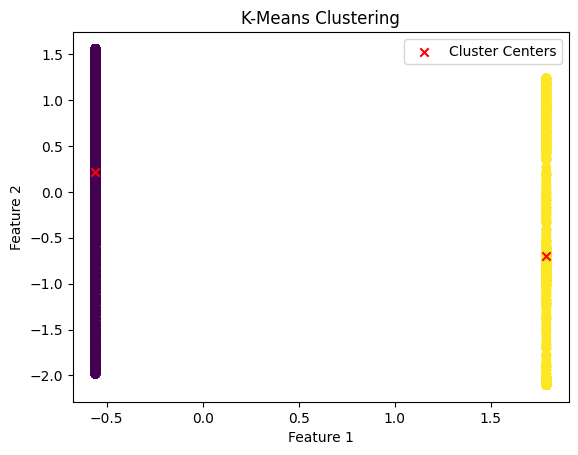

In [102]:

X = features  # Features
y = new_df['Cluster']  # Labels (for comparison later)

kmeans.fit(features_scaled)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the cluster centers
print("\nCluster Centers:")
print(cluster_centers)

# Visualize the clustering (using the features selected)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', label="Cluster Centers")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [103]:
# new_df['satisfaction_level'] = df['satisfaction_level'].map('{:.2%}'.format)
# new_df['last_evaluation']    = df['last_evaluation'].map('{:.2%}'.format)
new_df

,left,satisfaction_level,last_evaluation,Cluster
0,1,0.38,0.53,1
1,1,0.80,0.86,1
2,1,0.11,0.88,1
3,1,0.72,0.87,1
4,1,0.37,0.52,1
...,...,...,...,...
14994,1,0.40,0.57,1
14995,1,0.37,0.48,1
14996,1,0.37,0.53,1
14997,1,0.11,0.96,1


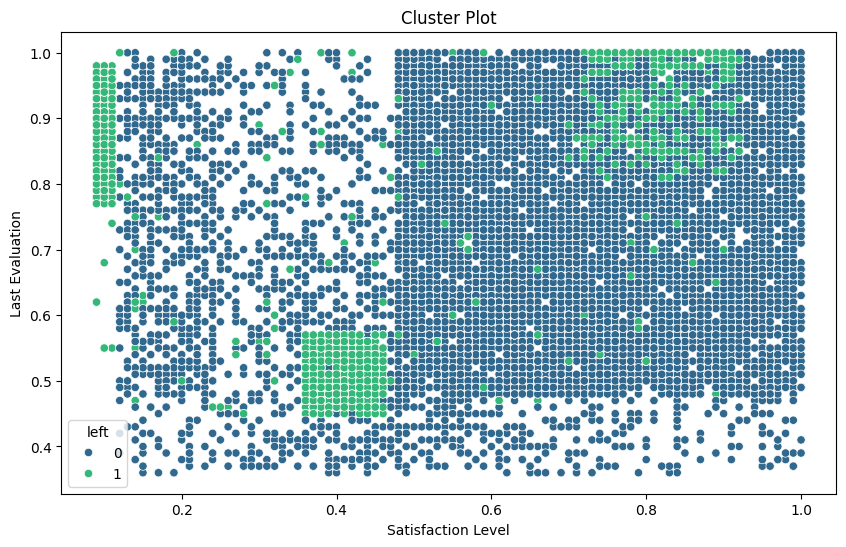

In [105]:
# prompt: Using dataframe new_df: cluster plot

import matplotlib.pyplot as plt
import seaborn as sns

# Create the cluster plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=new_df, palette='viridis')
plt.title('Cluster Plot')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()


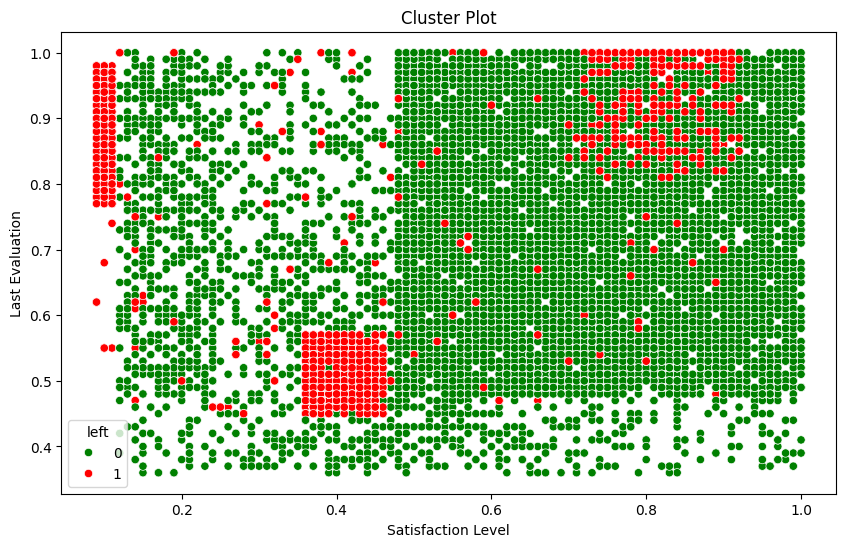

In [106]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

hue_colors = {1: 'red', 0: 'green'} # 1: Left / 0: Not Left

my_plt = sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=new_df, palette=hue_colors)
# my_plt.set_ylim(-2.0, 1.5)
# my_plt.set_xlim(-2.0, 1.5)

plt.title('Cluster Plot')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

In [96]:
new_df

,left,satisfaction_level,last_evaluation,Cluster
0,1,0.38,0.53,1
1,1,0.80,0.86,1
2,1,0.11,0.88,1
3,1,0.72,0.87,1
4,1,0.37,0.52,1
...,...,...,...,...
14994,1,0.40,0.57,1
14995,1,0.37,0.48,1
14996,1,0.37,0.53,1
14997,1,0.11,0.96,1


from matplotlib import pyplot as plt
new_df['left'].plot(kind='hist', bins=20, title='left')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['satisfaction_level'].plot(kind='hist', bins=20, title='satisfaction_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['last_evaluation'].plot(kind='hist', bins=20, title='last_evaluation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='left', y='satisfaction_level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='satisfaction_level', y='last_evaluation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='last_evaluation', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['left'].plot(kind='line', figsize=(8, 4), title='left')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_df['satisfaction_level'].plot(kind='line', figsize=(8, 4), title='satisfaction_level')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_df['last_evaluation'].plot(kind='line', figsize=(8, 4), title='last_evaluation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_df['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)